0
1


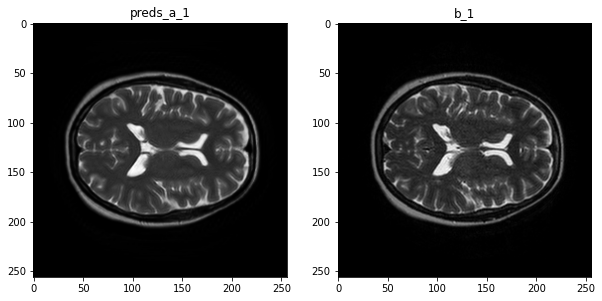

2
SSIM: 0.841
PSNR: 24.88


In [93]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from torchmetrics import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure
import torch
print("0")
# 파일 불러오기
path = "/SSD3_8TB/Daniel/13_misalign_proposed_final/logs/Model_proposed_A_to_B_Data_IXI_Misalign_X0_Y0_R0_M0.05_D0/LRE_CTX_100_5_100_120_motion_T2/runs/2023-08-13_12-52-23/results"
file1 = nib.load(f"{path}/preds_a_7.nii.gz").get_fdata()
# file1 = nib.load(f"{path}/preds_b_7.nii.gz").get_fdata()
# file2 = nib.load(f"{path}/a_1.nii.gz").get_fdata()
file2 = nib.load(f"{path}/b_7.nii.gz").get_fdata()
slice_num = 48

print("1")
# 47번째 slice를 plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(file1[..., slice_num], cmap='gray')
plt.title('preds_a_1')

plt.subplot(1, 2, 2)
plt.imshow(file2[..., slice_num], cmap='gray')
plt.title('b_1')

plt.show()
print("2")
# SSIM 및 PSNR 계산
ssim_module = StructuralSimilarityIndexMeasure()
psnr_module = PeakSignalNoiseRatio()

slice_file1 = torch.tensor(file1[..., slice_num])
slice_file2 = torch.tensor(file2[..., slice_num])

ssim_value = ssim_module(slice_file1.unsqueeze(0).unsqueeze(0), slice_file2.unsqueeze(0).unsqueeze(0))
psnr_value = psnr_module(slice_file1.unsqueeze(0).unsqueeze(0), slice_file2.unsqueeze(0).unsqueeze(0))

# Round the values to 3 decimal places
rounded_ssim_value = round(ssim_value.item(), 3)
rounded_psnr_value = round(psnr_value.item(), 2)

print(f"SSIM: {rounded_ssim_value}")
print(f"PSNR: {rounded_psnr_value}")